# Example on how to use the code

In [1]:
import random
import numpy as np
from src import RoomEnvironment, NoveltyAgent, SurpriseAgent, RandomAgent, InformationGainAgent, EmpowermentAgent, SPIEAgent, MOPAgent, Simulator
import time
import matplotlib.pyplot as plt

# Set seed
seed = 0
random.seed(seed)
np.random.seed(seed)

## Create an environment

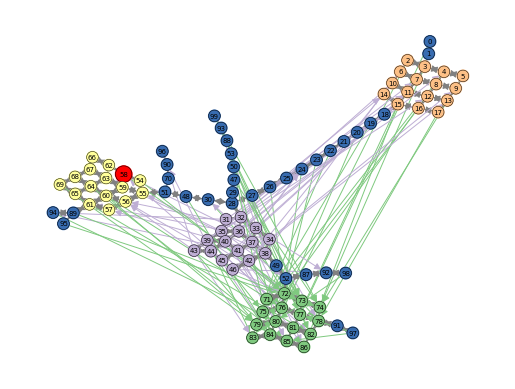

In [2]:
# Instantiate the environment with specified parameters
env = RoomEnvironment(
    n_init_states=40,
    branching_rate=0.2,
    room_size=4,
    p_room=4/40,
    p_sink=0.25,
    p_source=0.25,
    p_stoc=0.25,
    n_edges_per_sink=50,
    n_edges_per_source=50,
    uncontrollability=1.0,
    seed=seed
)

env.render()

## Create an agent

In [3]:
# Create an intrinsically motivated agent
ag_class = NoveltyAgent
βi = 50.0
model_fixed = False 

ag = ag_class(
    n_states=env.n_tot_states,
    n_actions_per_state=env.n_actions_per_state,
    ε=1/env.n_tot_states,
    βi=βi,
    λi=(0.5)**(2/env.n_tot_states),
    βe=0.0,
    λe=0.0,
    model_fixed=model_fixed
)

# Create a random agent
random_ag = RandomAgent(
    n_states=env.n_tot_states,
    n_actions_per_state=env.n_actions_per_state,
    ε=1/env.n_tot_states,
    βi=0.0,
    λi=0.0,
    βe=0.0,
    λe=0.0,
    model_fixed=False
)

## Setup the simulation

In [4]:
# Instantiate the simulator
n_iter = 2000               # Number of steps
eval_every = 20             # Evaluate the agents every eval_every steps
measure = 'state_discovery' # Measure to evaluate the agents

simulator = Simulator(
    measure_type=measure,
    n_iter=n_iter,
    eval_every=eval_every,
    verbose=True
)

## Run the agent and the random agent

In [5]:
# If the agent has a fixed model, set the transition matrix to the environment's transition matrix
ag.reset_model()
if model_fixed:
    ag.model_fixed = True
    ag.T = env.transition_matrix.copy()
    
print(f"Running {ag_class.__name__} in the environment")
t0 = time.time()
# Run the agent in the environment
perfs = simulator.measure_performance(ag, env)
print(f"Elapsed time: {time.time() - t0}")

print(f"Running random agent in the environment")
t0 = time.time()
# Run the random agent in the environment
perfs_random = simulator.measure_performance(random_ag, env)
print(f"Elapsed time: {time.time() - t0}")

Running NoveltyAgent in the environment
Performance at iteration, 20: 0.86
Performance at iteration, 40: 0.8
Performance at iteration, 60: 0.74
Performance at iteration, 80: 0.68
Performance at iteration, 100: 0.67
Performance at iteration, 120: 0.65
Performance at iteration, 140: 0.65
Performance at iteration, 160: 0.65
Performance at iteration, 180: 0.6
Performance at iteration, 200: 0.6
Performance at iteration, 220: 0.56
Performance at iteration, 240: 0.55
Performance at iteration, 260: 0.54
Performance at iteration, 280: 0.54
Performance at iteration, 300: 0.52
Performance at iteration, 320: 0.47
Performance at iteration, 340: 0.45
Performance at iteration, 360: 0.44
Performance at iteration, 380: 0.42
Performance at iteration, 400: 0.42
Performance at iteration, 420: 0.41
Performance at iteration, 440: 0.38
Performance at iteration, 460: 0.38
Performance at iteration, 480: 0.37
Performance at iteration, 500: 0.34
Performance at iteration, 520: 0.32
Performance at iteration, 540: 

## Plot the results

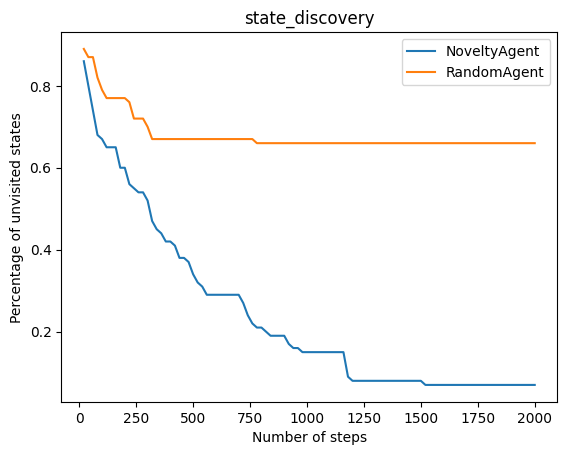

In [6]:
xticks = list(range(eval_every, n_iter+1, eval_every))

plt.plot(xticks, perfs, label=ag_class.__name__)
plt.plot(xticks, perfs_random, label='RandomAgent')
plt.ylabel("Percentage of unvisited states")
plt.xlabel("Number of steps")
plt.title(measure)
plt.legend()